In [1]:
import requests
import json
import pandas as pd

df = pd.read_json("https://tcgbusfs.blob.core.windows.net/blobyoubike/YouBikeTP.json")
print(df)

sno_list, x_list, y_list = ([] for i in range(3))
print("The latitude and logitude for each records:\n")

for key, value in df["retVal"].items():
    sno = value["sno"]
    lat = value["lat"]
    lng = value["lng"]
    print(sno, lat, lng)
    sno_list.append(sno)
    x_list.append(float(lng))
    y_list.append(float(lat))


     retCode                                             retVal
1          1  {'sno': '0001', 'sna': '捷運市政府站(3號出口)', 'tot': ...
2          1  {'sno': '0002', 'sna': '捷運國父紀念館站(2號出口)', 'tot'...
3          1  {'sno': '0003', 'sna': '台北市政府', 'tot': '40', '...
4          1  {'sno': '0004', 'sna': '市民廣場', 'tot': '60', 's...
5          1  {'sno': '0005', 'sna': '興雅國中', 'tot': '60', 's...
6          1  {'sno': '0006', 'sna': '臺北南山廣場', 'tot': '80', ...
7          1  {'sno': '0007', 'sna': '信義廣場(台北101)', 'tot': '...
8          1  {'sno': '0008', 'sna': '世貿三館', 'tot': '60', 's...
9          1  {'sno': '0009', 'sna': '松德站', 'tot': '40', 'sb...
10         1  {'sno': '0010', 'sna': '台北市災害應變中心', 'tot': '54...
11         1  {'sno': '0011', 'sna': '三張犁', 'tot': '50', 'sb...
12         1  {'sno': '0012', 'sna': '臺北醫學大學', 'tot': '48', ...
13         1  {'sno': '0013', 'sna': '福德公園', 'tot': '58', 's...
14         1  {'sno': '0014', 'sna': '榮星花園', 'tot': '32', 's...
16         1  {'sno': '0016', 'sna': '松山

0333 25.047428 121.561182
0334 25.028973 121.549024
0335 24.986301 121.567855
0336 25.063820 121.518150
0337 25.053010 121.575920
0338 25.045730 121.587940
0339 25.075810 121.518160
0340 25.051430 121.557160
0341 25.100940 121.522430
0342 25.107790 121.514680
0343 25.049040 121.587550
0344 25.042640 121.544010
0345 25.038060 121.519430
0346 25.091570 121.516690
0347 25.041340 121.511350
0348 25.058522 121.55942
0349 25.071830 121.513640
0350 25.029040 121.543360
0351 25.044690 121.519540
0352 25.063180 121.509440
0353 25.020880 121.520490
0354 25.040033 121.538084
0355 25.044780 121.617590
0356 25.067400 121.597490
0357 25.034230 121.576360
0358 25.060580 121.591100
0359 25.056010 121.563580
0360 25.062520 121.537540
0361 25.117700 121.522200
0362 25.026720 121.525330
0363 25.036170 121.543500
0364 25.021090 121.552190
0365 25.119120 121.512230
0366 25.079880 121.582870
0367 25.135970 121.497019
0368 25.102080 121.519790
0369 24.988620 121.543610
0370 25.026560 121.502420
0371 25.03532

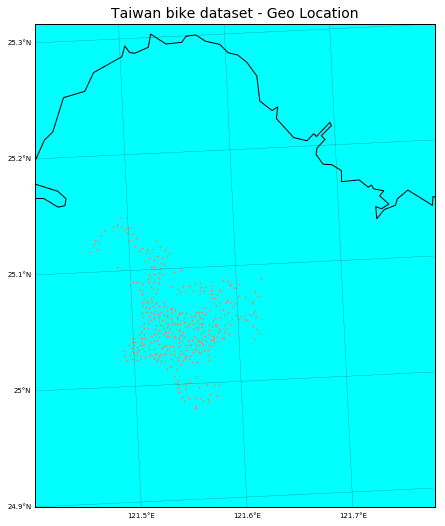

In [6]:
import os
os.environ['PROJ_LIB'] = 'C:/Users/User/Anaconda3/pkgs/proj4-5.2.0-h6538335_1006/Library/share/'

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6, 9))
ax = fig.add_axes([0.025, 0.025, 0.925, 0.925])

map = Basemap(llcrnrlon = 121.4, llcrnrlat = 24.9, urcrnrlon = 121.8, urcrnrlat = 25.3,resolution = 'h', epsg = 3415)
map.drawmapboundary(fill_color = 'aqua')
map.drawcoastlines()

parallels = np.arange(24., 26., 0.1)    
map.drawparallels(parallels,labels=[1, 0, 0, 0], fontsize=7, linewidth=0.3)
meridians = np.arange(120., 122.5, 0.1)  
map.drawmeridians(meridians,labels=[0, 0, 0, 1], fontsize=7, linewidth=0.3)

x, y = map(x_list, y_list)
map.scatter(x, y, marker = 'o', c='coral', s=0.7) 

plt.title("Taiwan bike dataset - Geo Location", fontsize=14)
plt.show()